# Dimensionality Reduction


## The Curse of Dimensionality and Reasons for Dimensionality Reduction



### To practice PCA, we first retrieve the familiar 20 newsgroups documents as shown below.

## Dimensionality Reduction Using PCA (Principal Component Analysis)



In [1]:
from sklearn.datasets import fetch_20newsgroups

# Create a list of topics you want to select from the 20 topics
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# Load the training dataset
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

In [2]:
# Check the size of the data
print(f"Number of documents: {len(newsgroups_train.data)}")

Number of documents: 2034


In [3]:
# Print the 5th document
print(newsgroups_train.data[5])

From: Nanci Ann Miller <nm0w+@andrew.cmu.edu>
Subject: Re: Genocide is Caused by Atheism
Organization: Sponsored account, School of Computer Science, Carnegie Mellon, Pittsburgh, PA
Lines: 27
NNTP-Posting-Host: andrew.cmu.edu
In-Reply-To: <1993Apr5.020504.19326@ultb.isc.rit.edu>

snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes:
> More horrible deaths resulted from atheism than anything else.

There are definitely quite a few horrible deaths as the result of both
atheists AND theists.  I'm sure Bobby can list quite a few for the atheist
side but fails to recognize that the theists are equally proficient at
genocide.  Perhaps, since I'm a bit weak on history, somone here would like
to give a list of wars caused/led by theists?  I can think of a few (Hitler
claimed to be a Christian for example) but a more complete list would
probably be more effective in showing Bobby just how absurd his statement
is.

> Peace,

On a side note, I notice you always sign your posts "Peace".  Perhaps you
s

In [4]:
# Get the category index of the 5th document
category_index = newsgroups_train.target[5]

In [5]:
# Get the category name using the index
category_name = newsgroups_train.target_names[category_index]

In [6]:
# Print the category name
print(f"Category: {category_name}")

Category: alt.atheism


### Remove parts of the email that may provide hints for classification, leaving only the content for pure classification


In [7]:

# Load the training dataset
newsgroups_train = fetch_20newsgroups(subset='train',
# Remove parts that provide hints (headers, footers, quotes) to classify purely based on the content
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
# Load the test dataset
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

After performing preprocessing steps such as tokenization, stopword removal, and stemming as done before, the data is prepared for document classification by converting it into a feature vector based on Bag of Words (BOW).

In [8]:
import nltk
nltk.download('stopwords')

X_train = newsgroups_train.data   # Training dataset documents
y_train = newsgroups_train.target # Training dataset labels

X_test = newsgroups_test.data     # Test dataset documents
y_test = newsgroups_test.target   # Test dataset labels

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

RegTok = RegexpTokenizer("[\w']{3,}") # Define tokenizer using regular expressions
english_stops = set(stopwords.words('english')) # Load English stopwords

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) # Check if this works as expected
    # Exclude stopwords
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    # Apply Porter Stemmer
    features = (list(map(lambda token: PorterStemmer().stem(token),words)))
    return features

tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train) # Transform the training set
X_test_tfidf = tfidf.transform(X_test) # Transform the test set

[nltk_data] Downloading package stopwords to /home/minjoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/minjoo/minjoo/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


To compare the classification performance after dimensionality reduction, the classification performance before dimensionality reduction is measured in advance using Scikit-learn's Logistic Regression library as shown below.

In [9]:
from sklearn.linear_model import LogisticRegression 

LR_clf = LogisticRegression()  # Declare the classifier
LR_clf.fit(X_train_tfidf, y_train)  # Train the classifier using the train data
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test)))

#Train set score: 0.962
#Test set score: 0.761


1: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- Scikit-learn provides the PCA library to support Principal Component Analysis.
- Parameters:
    -  n_components: Specifies the size of the dimensions to reduce.
    - svd_solver: The default is auto, which automatically selects the solver considering the original and target dimensions. If you don’t want to deal with this, you can leave it as the default.
    - explained_variance: The variance explained by each new axis.
    - explained_variance_ratio: Represents the ratio of the explained variance to the total variance before reduction. -> If the new axes explain all the original variance, the sum of explained_variance_ratio will be 1.

- In the following example, the dimensionality is reduced from 20,085 to 2,000. ('2,034' represents the number of documents. In other words, this TF-IDF matrix contains information about 2,034 documents, and 20,085 represents the number of unique words (features, tokens)).
    - Therefore, this matrix can be viewed as a two-dimensional array structure where each document (2,034 documents) has weights (TF-IDF values) related to 20,085 unique words.
    - These values represent how important a particular word (its weight) is in each document.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000, random_state=7)
# Scikit-learn's PCA does not directly support operations on sparse vector formats.
# In other words, you cannot directly pass the matrix transformed by CountVectorizer or TfidfVectorizer as an argument.
# Therefore, as shown below, first convert the format using the `toarray()` method, and then pass it as an argument to the `transform()` or `fit_transform()` methods.
X_train_pca = pca.fit_transform(X_train_tfidf.toarray()) 
X_test_pca = pca.transform(X_test_tfidf.toarray())

print('Original tfidf matrix shape:', X_train_tfidf.shape)  # The original dimensionality can be calculated
print('PCA Converted matrix shape:', X_train_pca.shape)
# After reduction, the sum of 'explained_variance_ratio_' is printed to see how much of the original variance is explained.
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

Original tfidf matrix shape: (2034, 20085)
PCA Converted matrix shape: (2034, 2000)
Sum of explained variance ratio: 1.000


- As we can see from the results, the original dimensionality is 20,085, which represents the number of words in the feature vector, and the reduced dimensionality is 2,000, as intended.
- Since the original number of dimensions is large, the computation is quite intensive, and as a result, it takes a considerable amount of time.
- Although it took some time, the dimensionality was reduced to almost 1/10, and the explained variance is still almost 100%, meaning there is minimal information loss.
- Let's examine the performance change by classifying the documents using the reduced data.

In [11]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

#Train set score: 0.962
#Test set score: 0.760


- From the results above, we can confirm that the performance is the same as before dimensionality reduction. 
- PCA maintains the maximum amount of information through linear combinations, so it produces different performance compared to feature selection.

So, how does it compare with feature selection using Lasso regression? To explore this, let's first perform Lasso regression as shown below.

In [12]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1)
lasso_clf.fit(X_train_tfidf, y_train)

# {:.3f} is used in Python's string formatting to display numbers up to 3 decimal places
print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))

import numpy as np
# Print the number of non-zero coefficients (features that were used)
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1])

#Train set score: 0.790
#Test set score: 0.718
#Used features count: 321 out of 20085


In [13]:
value = 3.14159
print('{:.3f}'.format(value))

3.142


- From the results above, we can see that the final number of features used is 321, and the performance on the text set has significantly dropped to 0.718 compared to before dimensionality reduction.
- For comparison with PCA, let's set the target dimension to 321, the same as in Lasso regression, and train the model with the transformed data as shown below.

In [14]:
pca = PCA(n_components=321, random_state=7)

X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

PCA Converted X shape: (2034, 321)
Sum of explained variance ratio: 0.437
#Train set score: 0.874
#Test set score: 0.752


- Despite the explained variance ratio dropping significantly to 43.7%, the accuracy on the text set only decreased by 1%, from 76.1% to 75.1%.
- Therefore, although the reduced dimensionality is the same as in Lasso regression, the classifier's performance is far superior.
- Now, let's be a little more ambitious and reduce the dimensionality to 100 as shown below.

In [15]:
pca = PCA(n_components=100, random_state=7)

X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

PCA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.211
#Train set score: 0.808
#Test set score: 0.738


- The accuracy on the test set is 73.8%, which is still better than the performance of the Lasso regression with 321 features.

## Dimensionality Reduction and Meaning Extraction Using LSA


### Dimensionality Reduction and Performance Using LSA


In [16]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2000, random_state=7)  # Specify the number of components to compress
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
# Print the sum of the explained variance ratio to see how much variance is explained by the selected components
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_lsa, y_train)  # Train the classifier on the LSA-transformed data
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_lsa, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_lsa, y_test)))

LSA Converted X shape: (2034, 2000)
Sum of explained variance ratio: 1.000
#Train set score: 0.962
#Test set score: 0.761


In [17]:
svd = TruncatedSVD(n_components=100, random_state=1)  # Specify the number of components to compress
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
# Print the sum of the explained variance ratio to see how much variance is explained by the selected components
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_lsa, y_train)  # Train the classifier on the LSA-transformed data
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_lsa, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_lsa, y_test)))

LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209
#Train set score: 0.811
#Test set score: 0.743


### Semantic-based document similarity calculation using LSA


In [18]:
from sklearn.metrics.pairwise import cosine_similarity

print('# All categories used:', newsgroups_train.target_names)
print('# Category of the first document:', y_train[0])

# Calculate the similarity between the transformed count vector and other original values
sim_result = cosine_similarity([X_train_lsa[0]], X_train_lsa)

# Top 20 similarities (LSA)
print("# Top 20 similarities (lsa):\n", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
# Top 20 similar news indexes (LSA)
print('# Top 20 similar news indexes (lsa):\n', sim_index)
sim_labels = [y_train[i] for i in sim_index]
# Categories of the top 20 similar news (LSA)
print('# Top 20 similar news categories (lsa):\n', sim_labels)

# All categories used: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
# Category of the first document: 1
# Top 20 similarities (lsa):
 [1.0, 0.74, 0.74, 0.72, 0.7, 0.7, 0.69, 0.67, 0.66, 0.65, 0.65, 0.65, 0.63, 0.62, 0.62, 0.62, 0.57, 0.57, 0.55, 0.54]
# Top 20 similar news indexes (lsa):
 [   0 1957 1674  501 1995 1490  790 1902 1575 1209 1728  892 1892  998
 1038 1826 1290 1089  867  151]
# Top 20 similar news categories (lsa):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [19]:
sim_result = cosine_similarity(X_train_tfidf[0], X_train_tfidf)

# Top 20 similarities (TF-IDF)
print("#Top 20 similarities (tfidf):\n", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
# Top 20 similar news indexes (TF-IDF)
print('#Top 20 similar news indexes (tfidf):\n', sim_index)
sim_labels = [y_train[i] for i in sim_index]
# Categories of the top 20 similar news (TF-IDF)
print('#Top 20 similar news categories (tfidf):\n', sim_labels)

#Top 20 similarities (tfidf):
 [1.0, 0.3, 0.22, 0.21, 0.19, 0.19, 0.19, 0.17, 0.16, 0.16, 0.16, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.14]
#Top 20 similar news indexes (tfidf):
 [   0 1575 1892 1490  501 1290 1013  998 1636 1705 1995 1957 1664  651
 1038  429 1089 1209 1728 1803]
#Top 20 similar news categories (tfidf):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Analysis of Latent Topics


In [20]:
svd = TruncatedSVD(n_components=10, random_state=1)  # Specify the number of components to compress
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
# Print the sum of the explained variance ratio to show how much variance is explained by the selected components
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

terms = tfidf.get_feature_names_out() 
# Function to display the top terms for each topic
def get_topics(model, feature_names, n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx+1), 
              [feature_names[i] for i in topic.argsort()[:-n - 1:-1]])

get_topics(svd, terms)

LSA Converted X shape: (2034, 10)
Sum of explained variance ratio: 0.045
Topic 1: ['would', 'one', 'god', 'think', 'use', 'peopl', 'know', 'like', 'say', 'space']
Topic 2: ['god', 'christian', 'moral', 'jesu', 'believ', 'say', 'peopl', 'bibl', 'exist', 'religion']
Topic 3: ['space', 'orbit', 'nasa', 'launch', 'shuttl', 'satellit', 'year', 'moon', 'lunar', 'cost']
Topic 4: ['moral', 'object', 'system', 'valu', 'goal', 'think', 'anim', 'absolut', 'natur', 'defin']
Topic 5: ['ico', 'bobb', 'tek', 'beauchain', 'bronx', 'manhattan', 'sank', 'queen', 'vice', 'blew']
Topic 6: ['god', 'file', 'imag', 'object', 'moral', 'exist', 'space', 'format', 'system', 'color']
Topic 7: ['thank', 'god', 'pleas', 'object', 'moral', 'post', 'mail', 'space', 'graphic', 'appreci']
Topic 8: ['post', 'file', 'space', 'islam', 'read', 'cview', 'format', 'articl', 'group', 'moral']
Topic 9: ['christian', 'graphic', 'imag', 'jesu', 'book', 'data', 'group', 'softwar', 'law', 'code']
Topic 10: ['christian', 'moral', 

### Semantic Similarity Analysis Between Words


In [21]:
tfidf = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.5)
X_train_tfidf = tfidf.fit_transform(X_train)  # Transform the training set

svd = TruncatedSVD(n_components=100, random_state=1)  # Specify the number of components to compress
X_train_lsa = svd.fit_transform(X_train_tfidf)

print('# Shape of components_:', svd.components_.shape)
print('# Shape of singular_values_:', svd.singular_values_.shape)
# Transform the word-latent semantic matrix
t_words = np.diag(svd.singular_values_).dot(svd.components_).T
print('# Shape of transformed word-latent semantic matrix:', t_words.shape)

# Get the vector corresponding to the word "space"
source = t_words[np.where(tfidf.get_feature_names_out() == 'space')[0][0]]

# Calculate the similarity between the transformed count vector and the other words
sim_result = cosine_similarity([source], t_words)

# Top 20 similarities (TF-IDF)
print("#Top 20 similarities (tfidf):", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
# Top 20 similar word indexes (TF-IDF)
print('#Top 20 similar word indexes (tfidf):', sim_index)
# Get the corresponding words
sim_labels = [tfidf.get_feature_names_out()[i] for i in sim_index]
# Top 20 similar word categories (TF-IDF)
print('#Top 20 similar word categories (tfidf):', sim_labels)

# Shape of components_: (100, 1000)
# Shape of singular_values_: (100,)
# Shape of transformed word-latent semantic matrix: (1000, 100)
#Top 20 similarities (tfidf): [1.0, 0.73, 0.72, 0.69, 0.66, 0.58, 0.56, 0.56, 0.54, 0.54, 0.52, 0.52, 0.52, 0.51, 0.51, 0.5, 0.5, 0.49, 0.48, 0.47]
#Top 20 similar word indexes (tfidf): [812 314 754 829 594 679 720 650 785 565 101 435 606 545 854 746 669 856
 611 564]
#Top 20 similar word categories (tfidf): ['space', 'exploration', 'sci', 'station', 'office', 'propulsion', 'reports', 'planetary', 'shuttle', 'national', 'astro', 'international', 'operations', 'missions', 'technical', 'satellites', 'probes', 'telescope', 'orbiter', 'nasa']


## Visualization Using t-SNE and the Effect of Dimensionality Reduction


In [22]:
!pip install matplotlib

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# Handling the issue of broken minus signs in the graph fonts
mpl.rcParams['axes.unicode_minus'] = False

 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

- init='random' is a parameter in the t-SNE algorithm that specifies the method for initializing coordinates.
- t-SNE is a nonlinear dimensionality reduction technique that projects high-dimensional data into a lower-dimensional space (usually 2D or 3D).
- In this process, determining how to arrange the initial coordinates of high-dimensional data is crucial, and the init parameter controls this.
- t-SNE options:
    - init='random': The initial coordinates are set randomly. In other words, the algorithm starts by randomly assigning low-dimensional coordinates to each data point. Then, t-SNE adjusts the coordinates to maintain the similarity between the high-dimensional data points as much as possible.
    - init='pca' (default): The initial coordinates are precomputed using PCA, and t-SNE starts from these. Since PCA projects data in the direction of the largest variance, it provides a good starting point that better reflects the distribution of high-dimensional data.

/home/minjoo/minjoo/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TSNE dimension: (2034, 2)


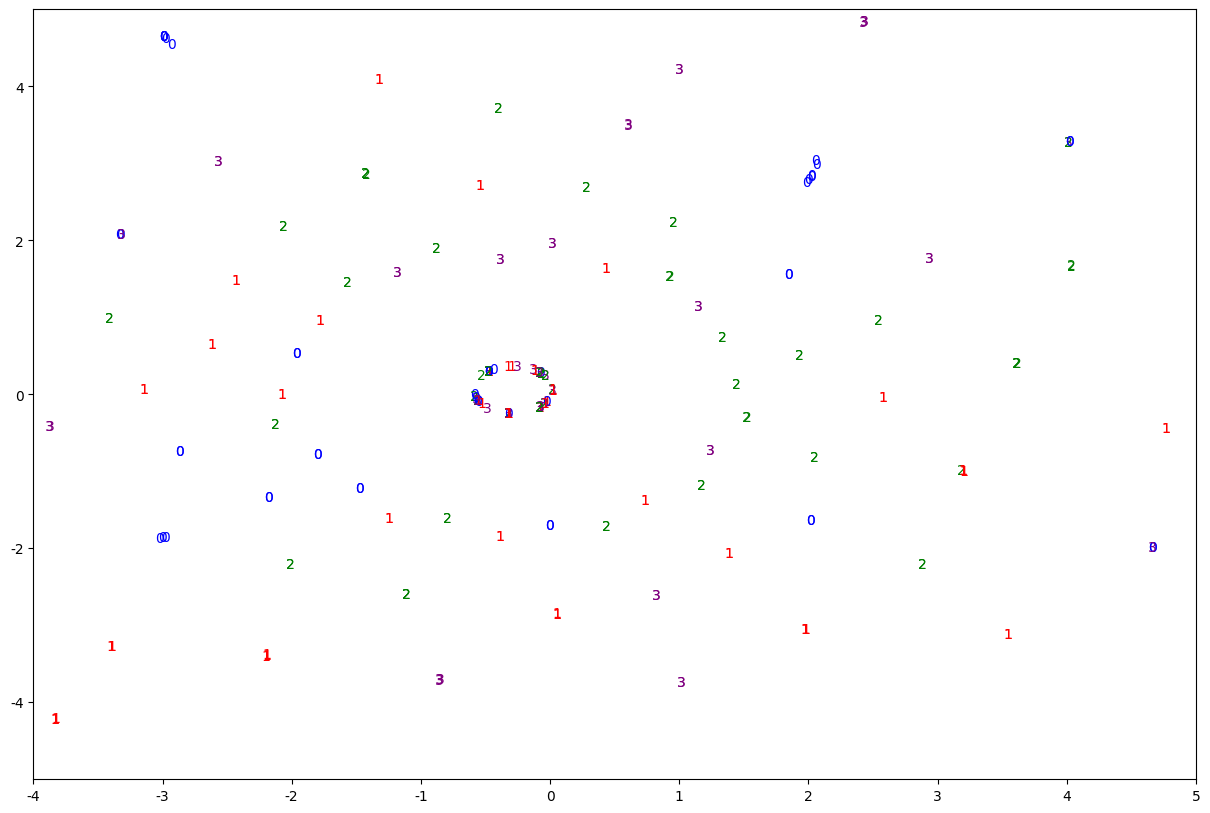

In [24]:
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train)  # Transform the train set
X_test_tfidf = tfidf.transform(X_test)  # Transform the test set

tsne = TSNE(n_components=2, random_state=7, init='random')
tsne_tfidf = tsne.fit_transform(X_train_tfidf)
print('TSNE dimension:', tsne_tfidf.shape)

def tsne_graph(tsne_2, label, lim=None):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}
    x = tsne_2[:,0]  # Use the first compressed dimension as the x-axis
    y = tsne_2[:,1]  # Use the second compressed dimension as the y-axis
    plt.figure(figsize=(15,10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    # for i in range(500):
    for i in range(len(x)):
        # Output text on the graph with color based on the y value (label) for each value
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color=colors[label[i]])
    plt.show()

tsne_graph(tsne_tfidf, y_train, (-4, 5, -5, 5))

LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209
TSNE dimension: (2034, 2)
#Selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


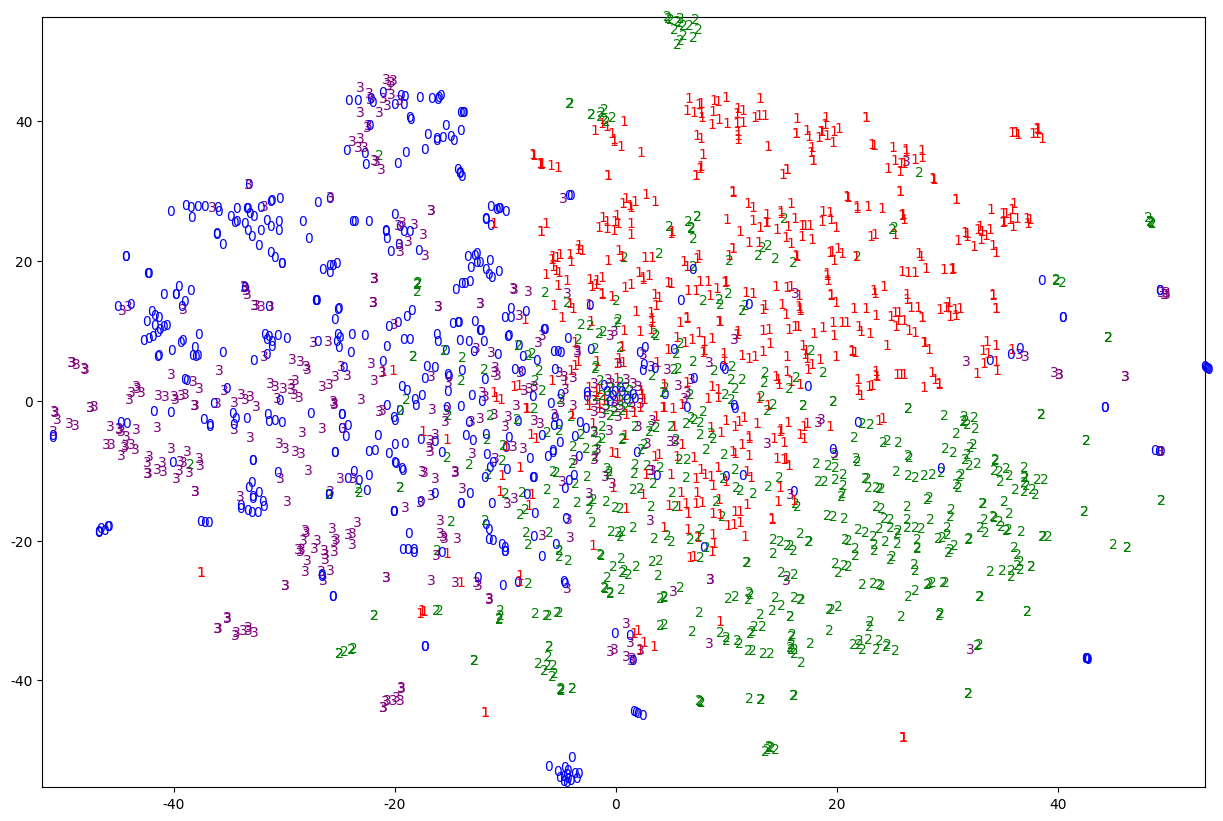

In [25]:
svd = TruncatedSVD(n_components=100, random_state=1)  # Specify the number of components to reduce
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
# Print the sum of the explained variance ratio to check how much variance is explained by the reduced dimensions
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

tsne_lsa = tsne.fit_transform(X_train_lsa)
print('TSNE dimension:', tsne_lsa.shape)
print('#Selected categories:', newsgroups_train.target_names)

tsne_graph(tsne_lsa, y_train)